# Analyze predicted phenotypes

Import `Python` modules

In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Read in data on mutations

In [41]:
subs_df = pd.read_csv('results/{experiment_label}_additive_phenotype.csv')
subs_df['aa_substitutions'].fillna('', inplace=True)
subs_df['nsubs'] = subs_df['aa_substitutions'].apply(lambda x: len(x.split(' ')))

In [42]:
subs_df.head()

,strain,seq,aa_substitutions,variant_escape_score,nsubs
0,HQ234498.1,IRCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELV...,,0.000000,1
1,KF993678,IRCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELV...,T120A Y158H V169I K283R F285S V317I I341V V343...,-5.471801,14
2,KJ776791,IRCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELV...,T120A Y158H V169I K283R F285S V317I I341V V343...,-5.471801,14
3,KU312312,IRCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELV...,T120A Y158H V169I K283R F285S V317I I341V V343...,-5.709405,15
4,KU321639,IRCIGVSNRDFVEGMSGGTWVDIVLEHGGCVTVMAQDKPTVDIELV...,V23I T120A Y158H V169I K283R F285S V317I I341V...,-5.338149,15


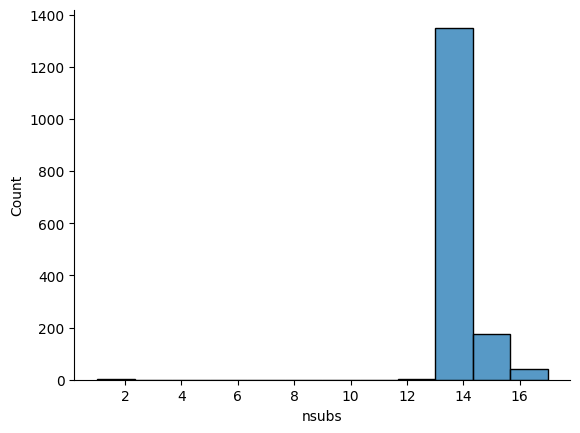

In [43]:
sns.histplot(x='nsubs', data=subs_df)
sns.despine()
plt.show()

In [23]:
aa_substitutions = df[df['strain'] == 'KF993678']['aa_substitutions'].iloc[0].split(' ')
aa_substitutions

['T120A',
 'Y158H',
 'V169I',
 'K283R',
 'F285S',
 'V317I',
 'I341V',
 'V343A',
 'D393E',
 'V437A',
 'F438L',
 'V473M',
 'T487M',
 'M495L']

Read in data on mut effects

In [25]:
mut_effects_df = pd.read_csv('my_profiles/diff-sel-data/MZ4/summary_MZ4-medianmutdiffsel.csv')
mut_effects_df['aa_substitution'] = mut_effects_df['wildtype'] + mut_effects_df['site'].astype('string') + mut_effects_df['mutation']
mut_effects_df.sort_values('site', inplace=True)
mut_effects_df.head()

,site,wildtype,mutation,mutdiffsel,aa_substitution
9407,1,I,V,-1.809514,I1V
9485,1,I,T,-2.208903,I1T
7816,1,I,N,-0.263705,I1N
8579,1,I,L,-0.610291,I1L
6834,1,I,S,-0.021196,I1S


In [28]:
mut_effects_df[
    mut_effects_df['aa_substitution'].isin(aa_substitutions)
]

,site,wildtype,mutation,mutdiffsel,aa_substitution
206,120,T,A,0.295154,T120A
374,158,Y,H,0.148574,Y158H
9393,169,V,I,-1.762585,V169I
9015,283,K,R,-0.975302,K283R
8798,285,F,S,-0.765144,F285S
8091,317,V,I,-0.364195,V317I
6911,341,I,V,-0.041233,I341V
7226,343,V,A,-0.141812,V343A
7189,393,D,E,-0.125070,D393E
7339,437,V,A,-0.179006,V437A


In [30]:
mut_effects_df['mutdiffsel'].min()

-4.81137849510672